# Chapter 4: Training Models Notes

## 1. Implementations of Linear Regression

### 1.1 The Normal Equation

- Recall: $\hat{\beta} = (X^T X)^{-1} X^T y$ and $\hat{y} = X \hat{\beta}$
- First, do some OG OLS `python` style

In [61]:
# Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

# Generate fake linear-ish data
np.random.seed(42)
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

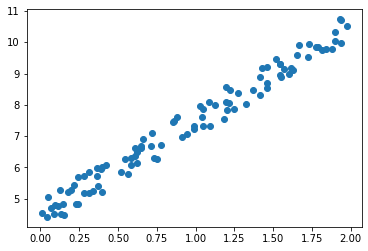

In [62]:
# Plot
plt.figure()
plt.plot(X, y, 'o')
plt.show()

In [63]:
# Do the manual matrix algebra
X_b = np.c_[np.ones((100, 1)), X] # add the intercept
beta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
beta_hat

array([[4.51359766],
       [2.98323418]])

In [64]:
y_hat = X_b.dot(beta_hat)

In [65]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_hat, y)

0.08495655256593736

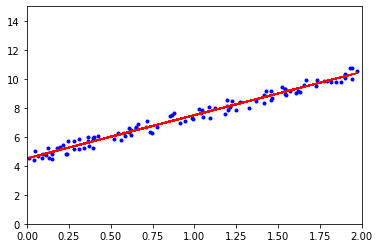

In [66]:
plt.figure()
plt.plot(X, y, 'b.')
plt.plot(X, y_hat, 'r-')
plt.axis([0, 2, 0, 15])
plt.show()

In [67]:
# Prediciton for some new data

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_pred = X_new_b.dot(beta_hat)
y_pred

array([[ 4.51359766],
       [10.48006601]])

### 1.2 Sklearn Version

In [68]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [69]:
lin_reg.predict(X_new) # perfect match

array([[ 4.51359766],
       [10.48006601]])

In [70]:
# sklearn just implements the SVD implementation from scipy

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

In [71]:
# Can also compute the pseudoinverse using numpy

np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

### 1.3 Gradient Descent

#### 1.3.1 Batch gradient descent

- GD on the whole dataset
$$\nabla_\theta \mathrm{MSE}(\theta) = \frac{2}{m} X^T (X \theta - y)$$
$$\theta^{\mathrm{next}} = \theta - \eta \nabla_\theta \mathrm{MSE}(\theta)$$

In [72]:
# Implementation

eta = 0.1 # learning rate
n_iterations = 1000
m = 100
np.random.seed(42)

theta = np.random.randn(2, 1) # random init

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [73]:
theta

array([[4.51359766],
       [2.98323418]])

In [74]:
# Obviously, convergence is modulated by the learning rate and the number of iterations
# Plot the convergence for different rates

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize = 18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize = 16)

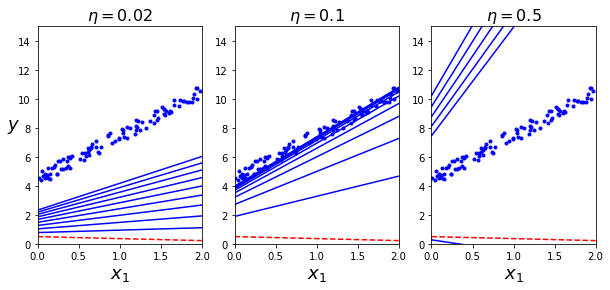

In [75]:
np.random.seed(42)

theta = np.random.randn(2, 1)

plt.figure(figsize = (10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta = 0.02)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(132); plot_gradient_descent(theta, eta = 0.1, theta_path = theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta = 0.5)

plt.show()

#### 1.3.2 Stochastic gradient descent

Consider implementing SGD with momentum reduction _learning schedule_

In [76]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients

In [77]:
theta

array([[4.5151857 ],
       [2.97924466]])

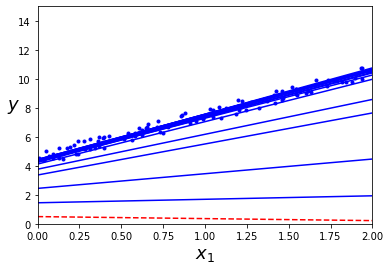

In [78]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

#### 1.3.3 sklearn SGD

In [79]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [80]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.49695399]), array([2.98441378]))

#### 1.3.4 Mini-batch GD

In [81]:
# Implement the algo (with momentum)

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000

def learning_schedule(t):
    return t0/(t + t1)

t = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta*gradients
        theta_path_mgd.append(theta)

In [82]:
theta

array([[4.52651397],
       [2.99723869]])

In [83]:
# Gather the different results

theta_path_bgd = np.array(theta_path_bgd) # batch descent
theta_path_sgd = np.array(theta_path_sgd) # stochastic descent w/momentum
theta_path_mgd = np.array(theta_path_mgd) # minibatch descent w/momentum

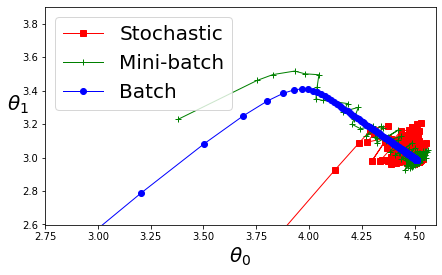

In [89]:
# Plot the convergence of the coefficients

plt.figure(figsize = (7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth = 1, label = "Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth = 1, label = "Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth = 1, label = "Batch")
plt.legend(loc = "upper left", fontsize = 20)
plt.xlabel(r"$\theta_0$", fontsize = 20)
plt.ylabel(r"$\theta_1$", fontsize = 20, rotation = 0)
plt.axis([2.75, 4.6, 2.6, 3.9])
plt.show()